In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVC

## import data and resampling

In [2]:
data=pd.read_csv('dicex_cleaned_mini.csv')

In [20]:
data.head()
data=data.iloc[:,2:]
data

,type_d_to,quantity_variance,frequency_variance,Time_interval_rate,activity_day,activity_hour,max_active_hour,transaction_level,Active_hour_len,Max_hour_len,label
0,1,1.343333e+00,6.333333,10.526316,3,2.000000,3,11,1.000000,1,0
1,1,1.682000e-03,0.000000,4.255319,2,1.500000,2,6,1.000000,1,0
2,1,1.155833e+02,108.000000,14.285714,3,1.000000,1,21,1.000000,1,0
3,1,3.225810e-04,0.032258,0.007132,31,1.032258,2,32,1.000000,1,1
4,1,3.225810e-04,0.032258,0.007156,31,1.032258,2,32,1.000000,1,1
5,1,3.225810e-04,0.032258,0.007117,31,1.032258,2,32,1.000000,1,1
6,1,3.225810e-04,0.032258,0.007123,31,1.032258,2,32,1.000000,1,1
7,1,3.225810e-04,0.032258,0.007137,31,1.032258,2,32,1.000000,1,1
8,1,1.143555e+02,21.200000,8.000000,5,1.200000,2,21,1.200000,2,0
9,1,3.225810e-04,0.032258,0.007139,31,1.032258,2,32,1.000000,1,1


In [4]:
def bootstrap_resample(X, n=None):
    """ Bootstrap resample an array_like
    Parameters
    ----------
    X : array_like
      data to resample
    n : int, optional
      length of resampled array, equal to len(X) if n==None
    Results
    -------
    returns X_resamples
    """
    if isinstance(X, pd.Series):
        X = X.copy()
        X.index = range(len(X.index))
    if n == None:
        n = len(X)
        
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = np.array(X[resample_i])  
    return X_resample

In [5]:
data_boo = pd.DataFrame(data.copy())
type(data_boo)

pandas.core.frame.DataFrame

In [6]:
for col in data_boo.columns:
    data_boo[col]=bootstrap_resample(data[col])

In [7]:
data_boo=pd.concat([data,data_boo])

In [8]:
data_boo.shape

(40, 13)

In [9]:
data_boo.label.mean(),data.label.mean()

(0.55, 0.55)

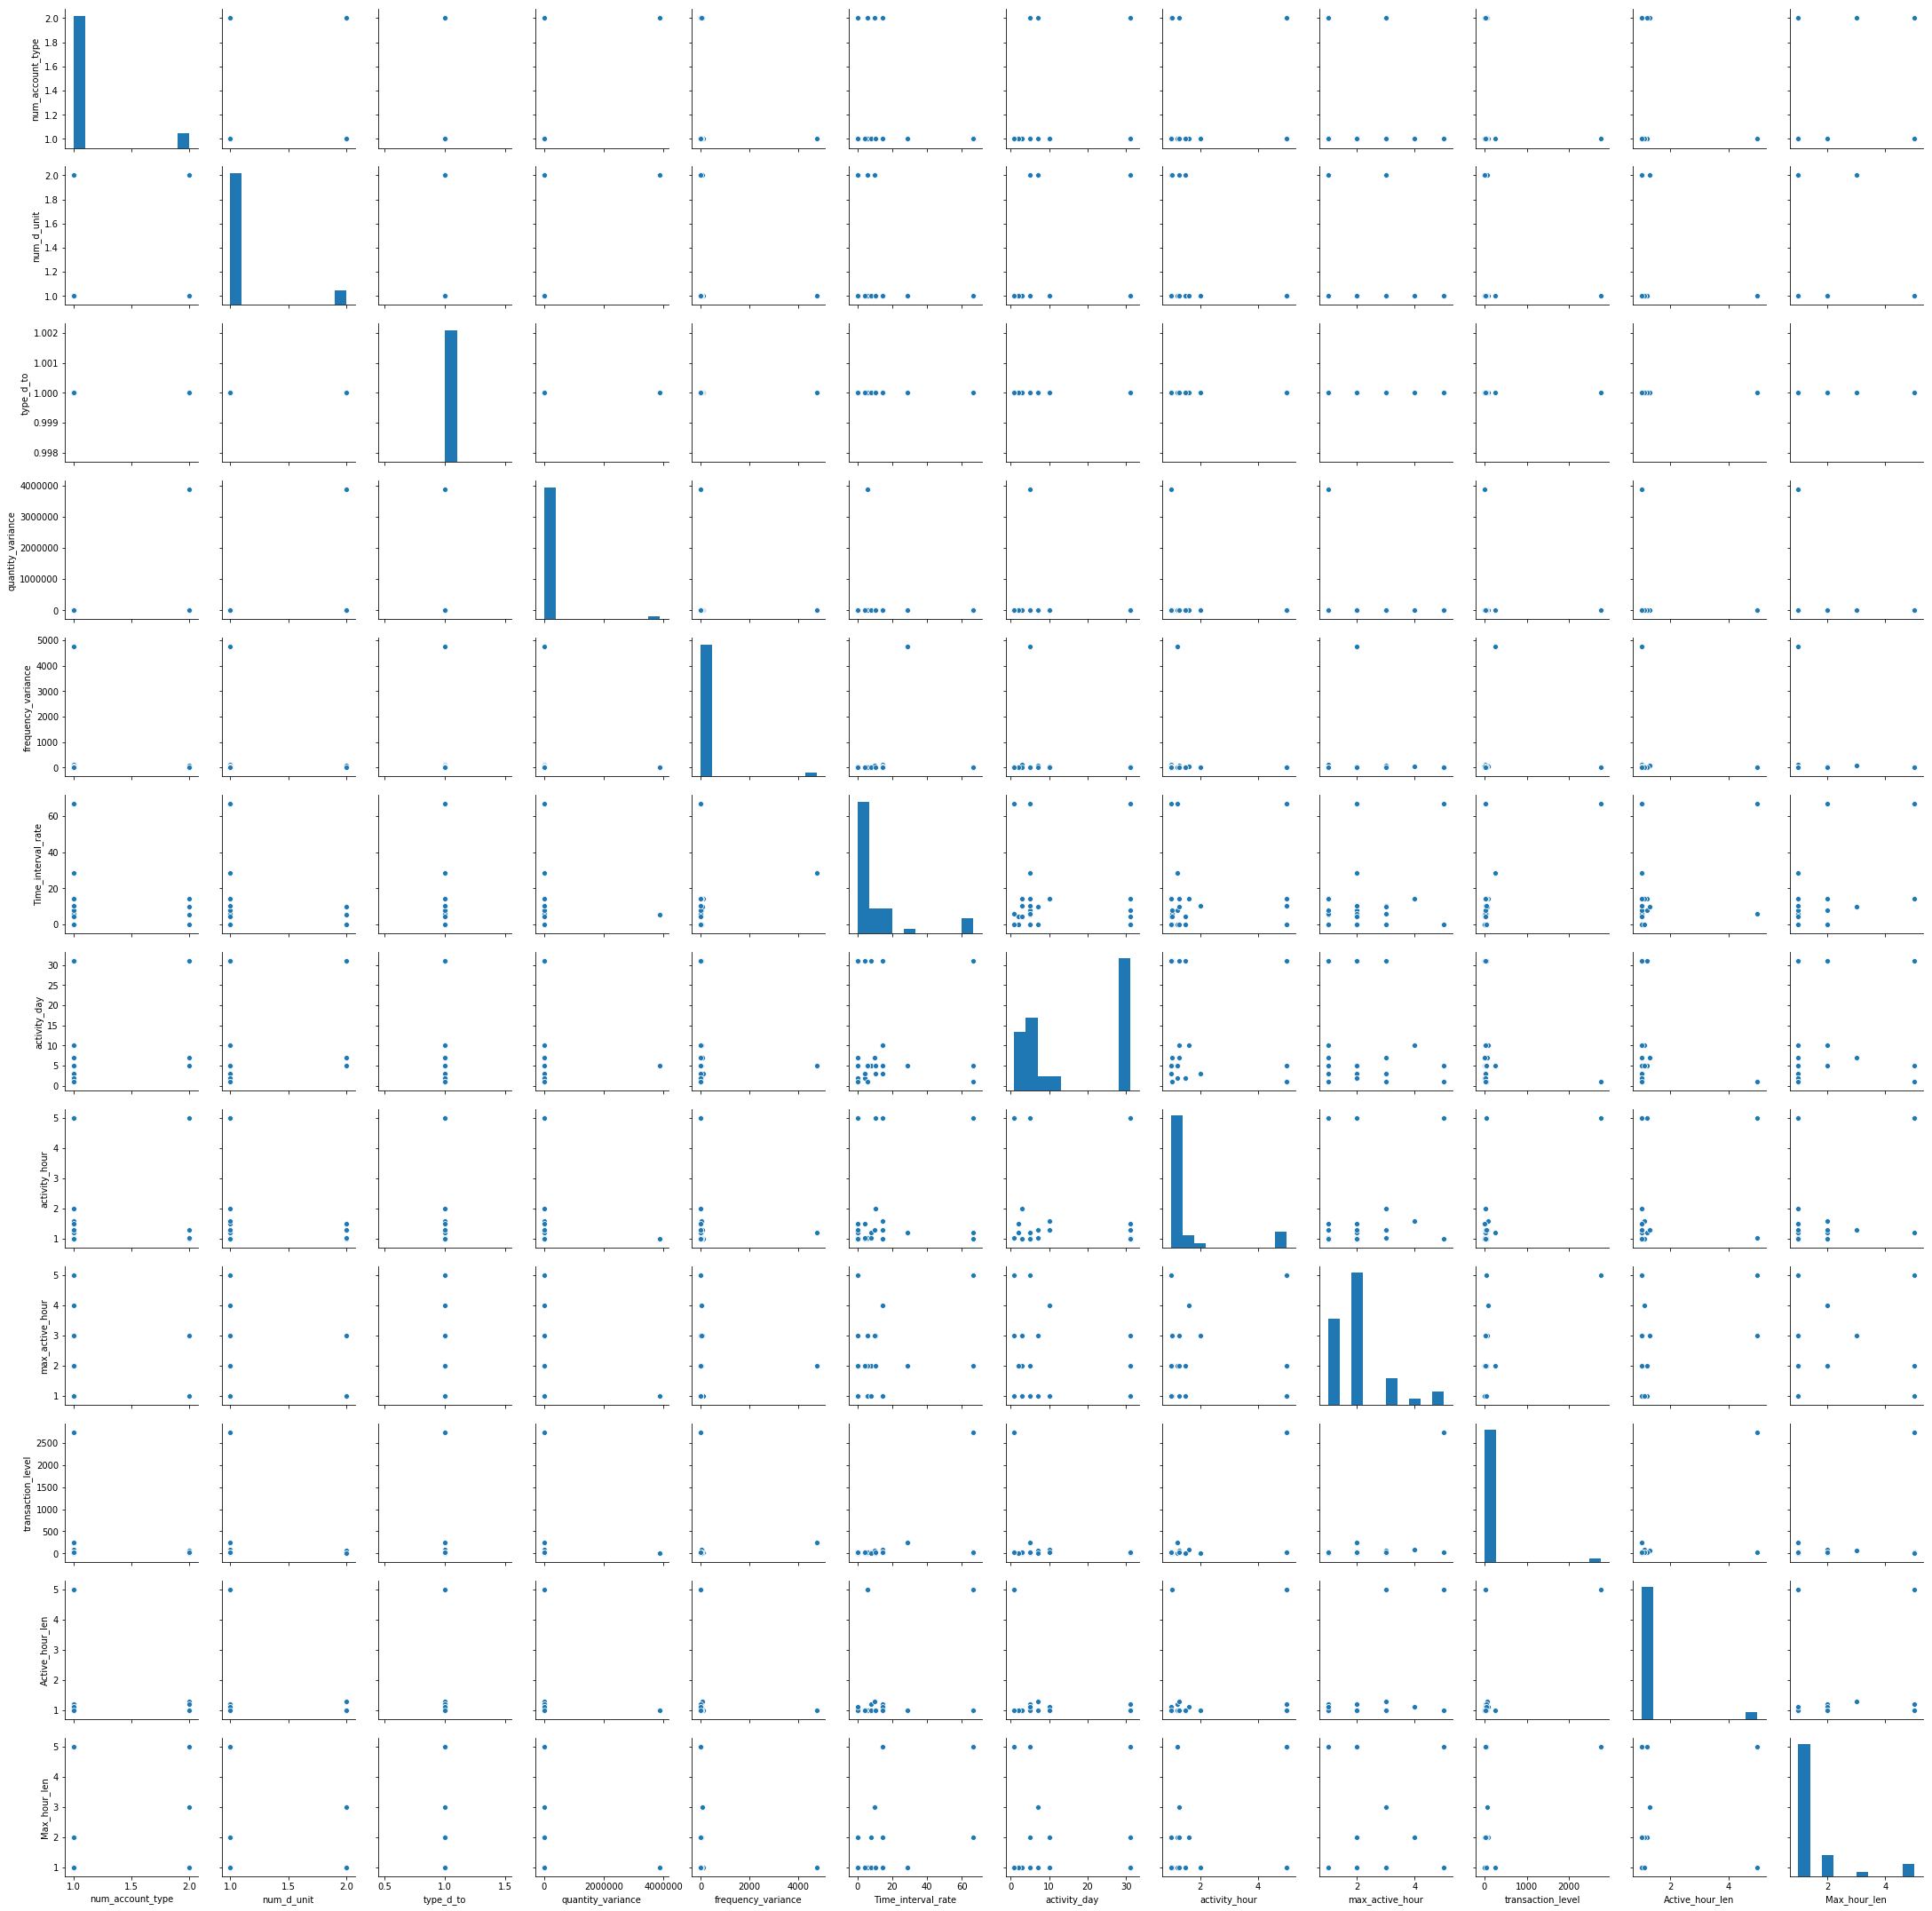

In [10]:
temp=data_boo.iloc[:,:-1]

import seaborn as sns

sns.pairplot(temp, kind="scatter")
plt.show()

In [11]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

def variance_inflation_factors(exog_df):
    '''
    Parameters
    ----------
    exog_df : dataframe, (nobs, k_vars)
        design matrix with all explanatory variables, as for example used in
        regression.

    Returns
    -------
    vif : Series
        variance inflation factors
    '''
    exog_df = add_constant(exog_df)
    vifs = pd.Series(
        [1 / (1. - OLS(exog_df[col].values, 
                       exog_df.loc[:, exog_df.columns != col].values).fit().rsquared) 
         for col in exog_df],
        index=exog_df.columns,
        name='VIF'
    )
    return vifs

variance_inflation_factors(temp)


/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


num_account_type       2.328136
num_d_unit             1.539871
type_d_to             45.091500
quantity_variance      1.833656
frequency_variance     1.167389
Time_interval_rate     2.811471
activity_day           1.353408
activity_hour          1.753033
max_active_hour        1.621268
transaction_level      3.290329
Active_hour_len        2.144308
Max_hour_len           3.531375
Name: VIF, dtype: float64

In [12]:
data_boo=data_boo.drop('type_d_to',axis=1)
data_boo

,num_account_type,num_d_unit,quantity_variance,frequency_variance,Time_interval_rate,activity_day,activity_hour,max_active_hour,transaction_level,Active_hour_len,Max_hour_len,label
0,1,1,1.343333e+00,6.333333,10.526316,3,2.000000,3,11,1.000000,1,0
1,1,1,1.682000e-03,0.000000,4.255319,2,1.500000,2,6,1.000000,1,0
2,1,1,1.155833e+02,108.000000,14.285714,3,1.000000,1,21,1.000000,1,0
3,1,1,3.225810e-04,0.032258,0.007132,31,1.032258,2,32,1.000000,1,1
4,1,1,3.225810e-04,0.032258,0.007156,31,1.032258,2,32,1.000000,1,1
5,1,1,3.225810e-04,0.032258,0.007117,31,1.032258,2,32,1.000000,1,1
6,1,1,3.225810e-04,0.032258,0.007123,31,1.032258,2,32,1.000000,1,1
7,1,1,3.225810e-04,0.032258,0.007137,31,1.032258,2,32,1.000000,1,1
8,1,1,1.143555e+02,21.200000,8.000000,5,1.200000,2,21,1.200000,2,0
9,1,1,3.225810e-04,0.032258,0.007139,31,1.032258,2,32,1.000000,1,1


In [13]:
temp=data_boo[:-1]
variance_inflation_factors(temp)

const                 52.986647
num_account_type       2.430477
num_d_unit             1.603349
quantity_variance      1.875489
frequency_variance     1.374989
Time_interval_rate     6.238497
activity_day           2.566360
activity_hour          2.011698
max_active_hour        1.657984
transaction_level      4.049617
Active_hour_len        2.349233
Max_hour_len           5.704526
label                  2.578740
Name: VIF, dtype: float64

## modeling with bootstrap

In [14]:
X=data_boo.iloc[:,:-1].values
y=data_boo['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
log_model=LogisticRegression().fit(X_train,y_train)
y_pred=log_model.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.75
[[2 2]
 [0 4]]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [16]:
Bayes_model=GaussianNB().fit(X_train,y_train)
y_pred=Bayes_model.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.75
[[0 0]
 [2 6]]


In [17]:
CART_model=DecisionTreeClassifier().fit(X_train,y_train)
y_pred=CART_model.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.75
[[2 2]
 [0 4]]


In [18]:
"""from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(CART_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = data_boo.columns[:-1],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('cart.png')
Image(graph.create_png())"""


"from sklearn.tree import export_graphviz\nfrom sklearn.externals.six import StringIO  \nfrom IPython.display import Image  \nimport pydotplus\ndot_data = StringIO()\nexport_graphviz(CART_model, out_file=dot_data,  \n                filled=True, rounded=True,\n                special_characters=True,feature_names = data_boo.columns[:-1],class_names=['0','1'])\ngraph = pydotplus.graph_from_dot_data(dot_data.getvalue())  \n#graph.write_png('cart.png')\nImage(graph.create_png())"

In [19]:
#pip install pydotplus